In [40]:
import pandas as pd
df = pd.read_csv("data_summer2025.csv")
df

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
0,Trent Alexander-Arnold,Right-Back,26,€75.00m,England,Premier League,Liverpool FC,Spain,LaLiga,Real Madrid,10.0,False
1,Matheus Cunha,Second Striker,26,€60.00m,England,Premier League,Wolverhampton Wanderers,England,Premier League,Manchester United,74.2,False
2,Dean Huijsen,Centre-Back,20,€60.00m,England,Premier League,AFC Bournemouth,Spain,LaLiga,Real Madrid,62.5,False
3,Estêvão,Right Winger,18,€60.00m,Brazil,Série A,Sociedade Esportiva Palmeiras,England,Premier League,Chelsea FC,34.0,False
4,Tijjani Reijnders,Central Midfield,26,€50.00m,Italy,Serie A,AC Milan,England,Premier League,Manchester City,55.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1203,Conor Tönnies,Second Striker,19,-,Germany,Oberliga Niederrhein,SpVg Schonnebeck,Germany,Regionalliga West,Fortuna Düsseldorf II,10k,False
1204,Warren Ngana,Centre-Back,16,-,Sweden,Without League,Djurgårdens IF U17,Germany,Without League,RB Leipzig U19,1.0,False
1205,David Asanka,Striker,20,-,Israel,Without League,Beitar Nordia Jerusalem,Israel,Liga Leumit,Hapoel Ramat Gan,25k,False
1206,Conor Tönnies,Second Striker,19,-,Germany,Oberliga Niederrhein,SpVg Schonnebeck,Germany,Regionalliga West,Fortuna Düsseldorf II,10k,False


In [41]:
df.groupby('position').size().sort_values(ascending=False)

position
Centre-Back           246
Centre-Forward        175
Central Midfield      106
Right Winger           93
Attacking Midfield     92
Defensive Midfield     87
Right-Back             84
Left Winger            80
Left-Back              75
Goalkeeper             68
Second Striker         44
Striker                38
Right Midfield         11
Left Midfield           9
dtype: int64

In [42]:
df.groupby('loan').size().sort_values(ascending=False)

loan
False    1153
True       55
dtype: int64

In [43]:
df.groupby('country_from').size().sort_values(ascending=False)

country_from
Germany      169
England       81
France        60
Israel        51
Italy         51
            ... 
Iraq           1
Singapore      1
Angola         1
Lithuania      1
Zambia         1
Length: 81, dtype: int64

In [44]:
df.groupby('country_to').size().sort_values(ascending=False)

country_to
Germany      199
England       99
Israel        59
Italy         52
Belgium       49
            ... 
Indonesia      1
China          1
India          1
Iceland        1
Libya          1
Length: 80, dtype: int64

In [45]:
df.groupby('club_from').size().sort_values(ascending=False)

club_from
Djurgårdens IF U17         36
Beitar Nordia Jerusalem    36
SpVg Schonnebeck           36
Hannover 96                 9
Bayer 04 Leverkusen         6
                           ..
FC Hradec Kralove           1
FC Hansa Rostock            1
FC Famalicão                1
FC Erzgebirge Aue           1
Östers IF                   1
Length: 699, dtype: int64

In [46]:
df.groupby('club_to').size().sort_values(ascending=False)

club_to
RB Leipzig U19           36
Fortuna Düsseldorf II    36
Hapoel Ramat Gan         36
Górnik Zabrze             9
FC Utrecht                8
                         ..
Club Alianza Lima         1
Club Atlético Tigre       1
Kisvárda FC               1
Kilmarnock FC             1
HSK Zrinjski Mostar       1
Length: 590, dtype: int64

In [47]:
def clean_fee(value):
    if isinstance(value, str):
        if 'k' in value:
            value = value.replace('k', '')  
            return float(value) * 1000  
        else:
            value = float(value)
            if value < 100:
                return value * 1000000  
            else:
                return value  
    try:
        value = float(value)
        if value < 100:
            return value * 1000000  
        else:
            return value 
    except ValueError:
        return 0

def clean_market_value(value):
    if isinstance(value, str):
        value = value.replace('€', '').replace('m', '').strip()  
        try:
            return float(value) * 1000000 if 'm' in value else float(value)
        except ValueError:
            return 0  
    return value 

df['fee'] = df['fee'].apply(clean_fee)
df['market_value'] = df['market_value'].apply(clean_market_value)

In [62]:
df.sort_values(by=['fee'], ascending=False)

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
1,Matheus Cunha,Second Striker,26.0,60.0,England,Premier League,Wolverhampton Wanderers,England,Premier League,Manchester United,74200000.0,False
2,Dean Huijsen,Centre-Back,20.0,60.0,England,Premier League,AFC Bournemouth,Spain,LaLiga,Real Madrid,62500000.0,False
4,Tijjani Reijnders,Central Midfield,26.0,50.0,Italy,Serie A,AC Milan,England,Premier League,Manchester City,55000000.0,False
6,Franco Mastantuono,Right Winger,18.0,30.0,Argentina,Torneo Apertura,CA River Plate,Spain,LaLiga,Real Madrid,45000000.0,False
5,Jeremie Frimpong,Right-Back,24.0,50.0,Germany,Bundesliga,Bayer 04 Leverkusen,England,Premier League,Liverpool FC,40000000.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
700,Soulaiman El Amrani,Centre-Back,28.0,0.0,Morocco,Botola Pro Inwi,Olympique Safi,Morocco,Botola Pro Inwi,FUS Rabat,0.0,False
701,Kacper Lukasiak,Attacking Midfield,21.0,0.0,Poland,Ekstraklasa,Pogon Szczecin,Poland,Ekstraklasa,GKS Katowice,0.0,False
702,Israel Alba,Right-Back,30.0,0.0,Colombia,Liga Dimayor I,Asociación Deportivo Pasto,Colombia,Liga Dimayor I,Atlético Bucaramanga,0.0,False
703,Carlos Jatobá,Central Midfield,29.0,0.0,Azerbaijan,Premyer Liqa,Araz-Nakhchivan,"Korea, South",K League 1,Daegu FC,0.0,False


In [49]:
df[(df['country_from'] == 'Japan') | (df['country_to'] == 'Japan')]

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
215,Isa Sakamoto,Centre-Forward,21,2.5,Japan,J1 League,Gamba Osaka,Belgium,Jupiler Pro League,KVC Westerlo,0.0,False
304,Alexander Scholz,Centre-Back,32,1.5,Qatar,Stars League,Al-Wakrah SC,Japan,J1 League,FC Tokyo,0.0,False
314,Takuma Ominami,Centre-Back,27,1.3,Japan,J1 League,Kawasaki Frontale,Belgium,Jupiler Pro League,Oud-Heverlee Leuven,600000.0,False
338,Ryoya Ogawa,Left-Back,28,1.2,Belgium,Jupiler Pro League,Sint-Truidense VV,Japan,J1 League,Kashima Antlers,0.0,False
365,Yu Hirakawa,Right Winger,24,1.0,Japan,J1 League,Machida Zelvia,England,Championship,Bristol City,0.0,False
367,Dion Cools,Right-Back,28,1.0,Thailand,Thai League,Buriram United,Japan,J1 League,Cerezo Osaka,0.0,False
368,Lelê,Centre-Forward,27,1.0,Brazil,Série A,Fluminense Football Club,Japan,J1 League,Nagoya Grampus,0.0,True
398,Hiiro Komori,Centre-Forward,24,0.0,Japan,J2 League,JEF United Chiba,Japan,J1 League,Urawa Red Diamonds,0.0,False
407,Katsuya Nagato,Left-Back,30,0.0,Japan,J1 League,Yokohama F. Marinos,Japan,J1 League,Vissel Kobe,0.0,False
408,Jan Van den Bergh,Centre-Back,30,0.0,Netherlands,Eredivisie,NAC Breda,Japan,J2 League,Júbilo Iwata,800000.0,False


In [61]:
#transfers from Japan to overseas
df[(df['country_from'] == 'Japan') & (df['country_to'] != 'Japan')]['name']

215      Isa Sakamoto
314    Takuma Ominami
365       Yu Hirakawa
530       Sota Kitano
Name: name, dtype: object

In [51]:
#transfers from overseas to Japan
df[(df['country_to'] == 'Japan') & (df['country_from'] != 'Japan')]['name']

304     Alexander Scholz
338          Ryoya Ogawa
367           Dion Cools
368                 Lelê
408    Jan Van den Bergh
415            Shuto Abe
468      Mateus Brunetti
481           Sei Muroya
493        Seung-gyu Kim
757       Kyohei Yoshino
798         Mário Sérgio
Name: name, dtype: object

In [52]:
#all transfers for FC Tokyo
df[(df['club_from'] == 'FC Tokyo') | (df['club_to'] == 'FC Tokyo')]

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
304,Alexander Scholz,Centre-Back,32,1.5,Qatar,Stars League,Al-Wakrah SC,Japan,J1 League,FC Tokyo,0.0,False
481,Sei Muroya,Right-Back,31,0.0,Germany,2. Bundesliga,Hannover 96,Japan,J1 League,FC Tokyo,0.0,False
493,Seung-gyu Kim,Goalkeeper,34,0.0,Saudi Arabia,Saudi Pro League,Al-Shabab FC,Japan,J1 League,FC Tokyo,0.0,False
790,Motoki Nagakura,Centre-Forward,25,0.0,Japan,J1 League,Urawa Red Diamonds,Japan,J1 League,FC Tokyo,0.0,True


In [53]:
#transfers for all my favorite clubs
favoriteclubs = ['FC Tokyo', 'Melbourne Victory', 'Borussia Dortmund', 'Al-Nassr FC', 
         'Manchester United', 'AS Roma']

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
27,Enzo Le Fée,Central Midfield,25,18.0,Italy,Serie A,AS Roma,England,Premier League,Sunderland AFC,23000000.0,False
76,Samuel Dahl,Left-Back,22,7.0,Italy,Serie A,AS Roma,Portugal,Liga Portugal,SL Benfica,9000000.0,False
382,Ali Lajami,Centre-Back,29,0.0,Saudi Arabia,Saudi Pro League,Al-Nassr FC,Saudi Arabia,Saudi Pro League,Al-Hilal SFC,941000.0,False
526,Daniel Arzani,Right Winger,26,0.0,Australia,A-League Men,Melbourne Victory,Hungary,NB I.,Ferencvárosi TC,0.0,False
586,Kasey Bos,Left-Back,21,0.0,Australia,A-League Men,Melbourne Victory,Germany,Bundesliga,1.FSV Mainz 05,500000.0,False


In [ ]:
df[df['club_from'].isin(favoriteclubs)].sort_values(by ='club_from')

In [54]:
df[df['club_to'].isin(favoriteclubs)].sort_values(by='club_to')

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
263,Abdulmalik Al-Jaber,Central Midfield,21,0.0,Bosnia-Herzegovina,Without League,FK Zeljeznicar Sarajevo,Saudi Arabia,Without League,Al-Nassr FC,1800000.0,False
15,Jobe Bellingham,Central Midfield,19,22.0,England,Championship,Sunderland AFC,Germany,Bundesliga,Borussia Dortmund,30500000.0,False
20,Yan Couto,Right-Back,23,20.0,England,Premier League,Manchester City,Germany,Bundesliga,Borussia Dortmund,25000000.0,False
64,Daniel Svensson,Left-Back,23,12.0,Denmark,Superliga,FC Nordsjaelland,Germany,Bundesliga,Borussia Dortmund,6500000.0,False
304,Alexander Scholz,Centre-Back,32,1.5,Qatar,Stars League,Al-Wakrah SC,Japan,J1 League,FC Tokyo,0.0,False
481,Sei Muroya,Right-Back,31,0.0,Germany,2. Bundesliga,Hannover 96,Japan,J1 League,FC Tokyo,0.0,False
493,Seung-gyu Kim,Goalkeeper,34,0.0,Saudi Arabia,Saudi Pro League,Al-Shabab FC,Japan,J1 League,FC Tokyo,0.0,False
790,Motoki Nagakura,Centre-Forward,25,0.0,Japan,J1 League,Urawa Red Diamonds,Japan,J1 League,FC Tokyo,0.0,True
1,Matheus Cunha,Second Striker,26,60.0,England,Premier League,Wolverhampton Wanderers,England,Premier League,Manchester United,74200000.0,False
157,Diego León,Left-Back,18,4.0,Paraguay,Primera División Apertura,Club Cerro Porteño,England,Premier League,Manchester United,0.0,False


C:\Users\nusra\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


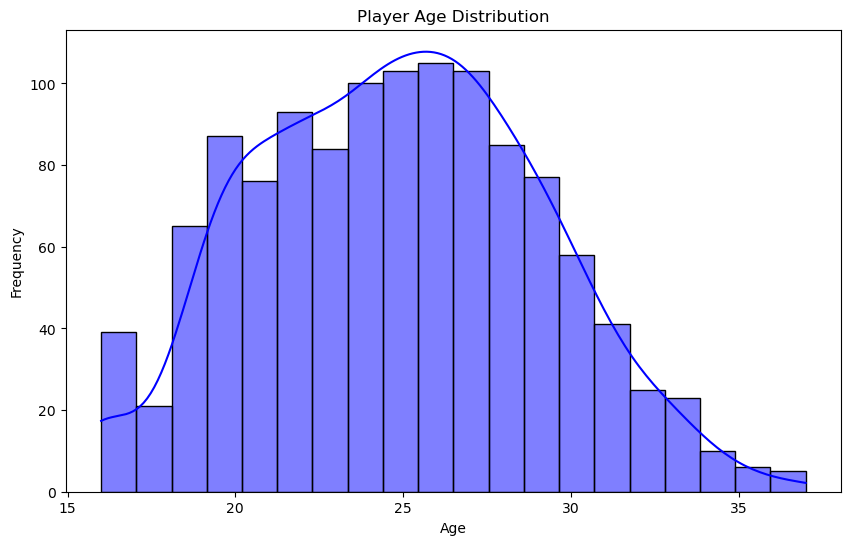

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['market_value'] = pd.to_numeric(df['market_value'], errors='coerce')

# 1. Player Age Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20, color='blue')
plt.title('Player Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


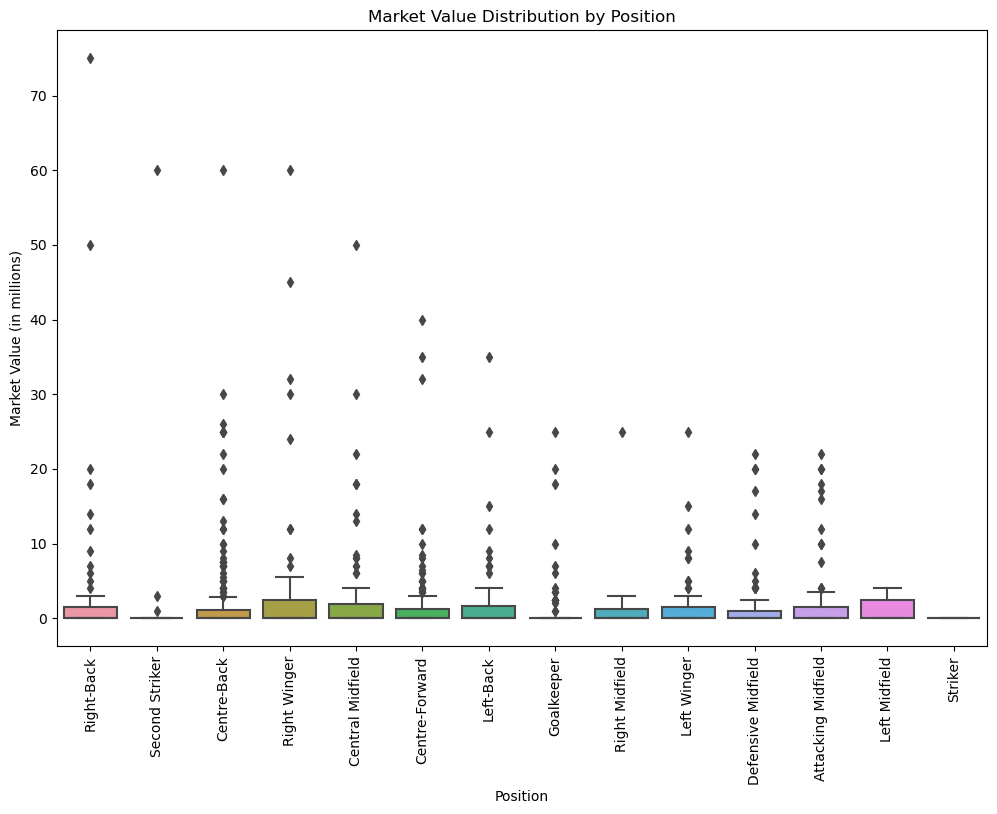

In [56]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='position', y='market_value', data=df)
plt.xticks(rotation=90)
plt.title('Market Value Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Market Value (in millions)')
plt.show()

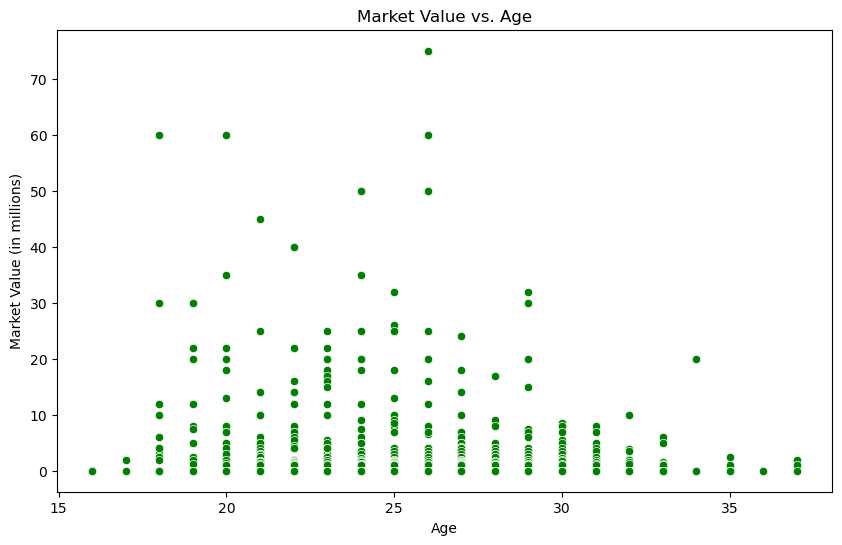

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='market_value', data=df, color='green')
plt.title('Market Value vs. Age')
plt.xlabel('Age')
plt.ylabel('Market Value (in millions)')
plt.show()


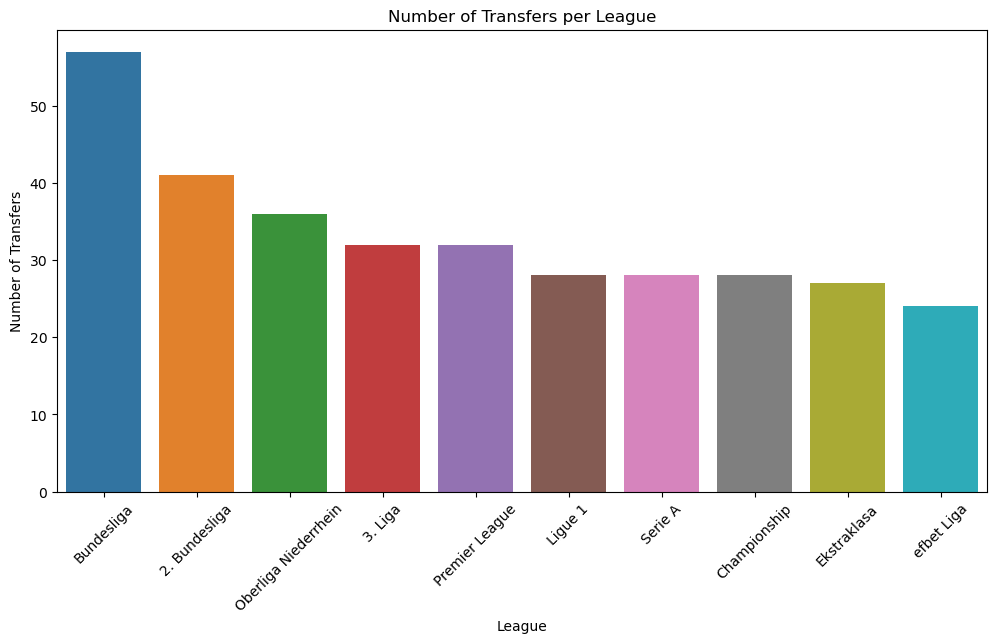

In [58]:
dff = df[df['league_from'] != "Without League"]
league_counts = dff['league_from'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=league_counts.index, y=league_counts.values)
plt.title('Number of Transfers per League')
plt.xlabel('League')
plt.ylabel('Number of Transfers')
plt.xticks(rotation=45)
plt.show()

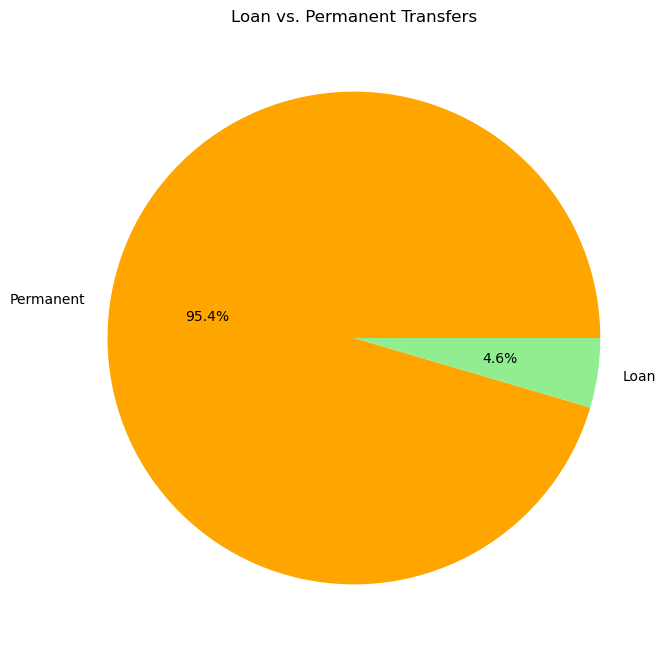

In [59]:
loan_status_counts = df['loan'].value_counts()
labels = ['Permanent', 'Loan']
plt.figure(figsize=(8, 8))
plt.pie(loan_status_counts, labels=labels, autopct='%1.1f%%', colors=['orange','lightgreen'])
plt.title('Loan vs. Permanent Transfers')
plt.show()